#Breast Cancer Wisconson (Diagnostic) Prediction

Problem Statement:

Our aim is to diagnose patients with breast cancer by analyzing the data of patients and classifying them into two categories, having diagnosis results as: (1) Benign(B) and (2) Malignant(M)

Libraries Used: 1) Numpy: The fundamental package for scientific computing with python 2) Pandas: An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the python programming language. 3) sklearn.model_selection: Split arrays or matrices into random train and test subsets Selecting optimal features 4) matplotlib.pyplot: Provides a MATLAB-like plotting framework. 5) Seaborn: Seaborn is a python data visualization library based on matplotlib. It provides a high-level interface for drawing attracitive and informative statistical graphics. 5) sklearn.metrics: Accuracy score: In multilabel classification, this function computes subset accuracy, the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Classification report: Build a report showing the main classification metrics Confusion matrix: Compute confusion matrix to evaluate the accuracy of classification.

In [1]:
# Import all needed libraries and sublibraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


Details of Data:

The data was collected from Kaggle: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

No of rows: 569 No of columns : 33

1) ID number The unique ID allotted to each patient to differentiate between them. 2) Diagnosis (M = malignant, B = benighn) The target variable .i.e the conclusion if the tumour is malignant or benign. 3 33) Ten real-valued features are computed for each cell nucleus: a) Radius The mean of distances from center to points on the perimeter. b) Texture The standard deviation of gray-scale values. c) Perimeter d) Area e) Smoothness The local variation in radius lengths. f) Compactness Perimeter^2/Area-1.0 g) Concavity The severity of concave partions of the contour. h) Concave Points Number of concave portions of the contour. i) Symmetry j) Fractal Dimension Coastline approximation

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. All feature values are recorded with four significant digits.

In [2]:
#Load the Data

df = pd.read_csv('data.csv')
df = df.dropna(axis=1)

2 Mapping string to numeric data

The feature "diagnosis" has values in the form of string ("object") which is mapped to numeric form for analysis The mapping function is:

'B' -> 0 'M' -> 1

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [4]:
# Dropping vectors having more than 95% correlation
corr_df = df.iloc[:,1:15].corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

Preprocessing of Data:

1. Visualization

Visual representation of data using histograms for each feature to get insights about the frequencey of various feature values in data.

2. Dimensionality reduction

The features which are highly correlated (show dependency) with the target variable ("diagnosis") are highly relevant for our classification problem. We can remove irrelevant attributes in order to reduce the size of data for easier computation. The irrelevant attributes can be found by computing the correlation among non-class attributs, and then we can reduce a subset of highly co-relevant non-class attributes to a single or less number of attributes which would reduce the size of data. Therefor, we create a heatmap to display the correlation between all the features.

This heatplot visualizes the correlation between each pair of attribute in the dataset. We can select those attributs which have high correlation with each othr according to a threshold value, and then we will implement the classification algorithm with a reduced set of attributes by taking various smaller subsets of the these highly correlated (dependent) attributes, and compare the results.

Here, we take threshold value: 0.95 From the heat plot we infer that the following features are the most related(corr> 95) to the other features:

1. Radius_mean
2. Perimeter_mean
3. Area_mean
4. Redius_worst
5. Perimetr_worst
6. Radius_se

In [5]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95) ]
reduced_df = df.drop(to_drop, axis=1)

Splitting of data into test and train sets

We now split the data into a test set and a training set. The test size is chosen to be 20% of the whole data.

In [6]:
X = reduced_df.iloc[:,2:29].values
Y = reduced_df.iloc[:,1].values
Xs = preprocessing.scale(X)
out=pd.DataFrame(Y)
X_train, X_test, y_train, y_test = train_test_split(Xs, out, test_size=0.2, random_state = 1)

Training the model and predictiong the target variable:

We are using logestic regration and saport verctor machen to train the model.

1)LOGISTIC REGRESSION MODEL

In [7]:
# logistic regression model

model = Sequential()
model.add(Dense(5,input_shape=(27,), activation='sigmoid',
               activity_regularizer =regularizers.l1(1e-4)))
model.add(Dense(1, activation='sigmoid'))
# Binary cross entropy is a cost function for binary classification
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [8]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 500,validation_split = 0.5, verbose = 0)

history_dict=history.history

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

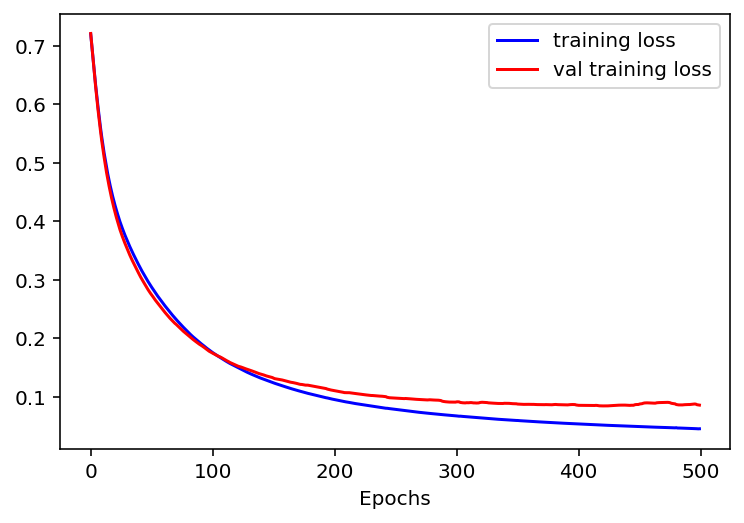

In [9]:
#Analyzing the predictions

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

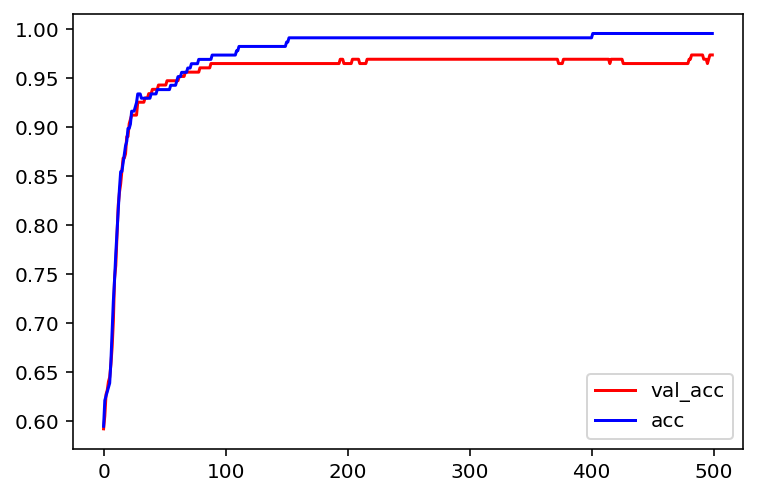

In [10]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

In [11]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 140us/step
Test loss:  0.13895599727045027
Test accuracy:  0.9649122765189723


In [12]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,Y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9930555555555556


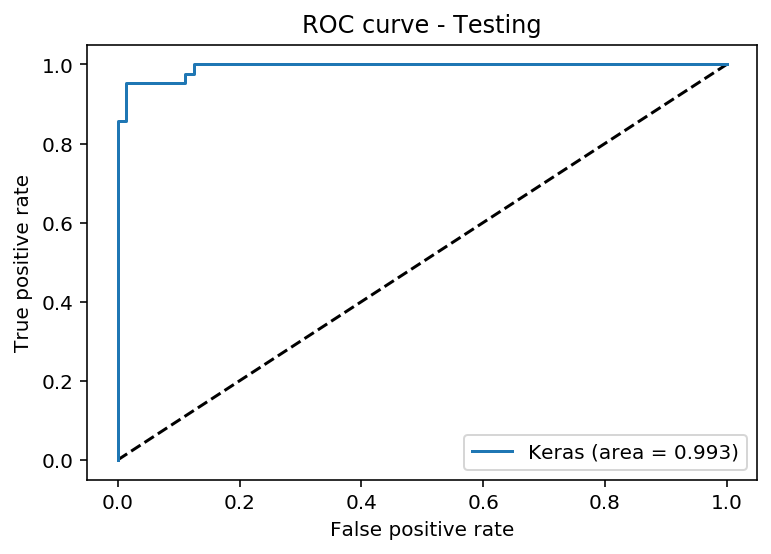

In [13]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Testing')
plt.legend(loc='best')
plt.show()

In [14]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
Y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,Y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9965737874097008


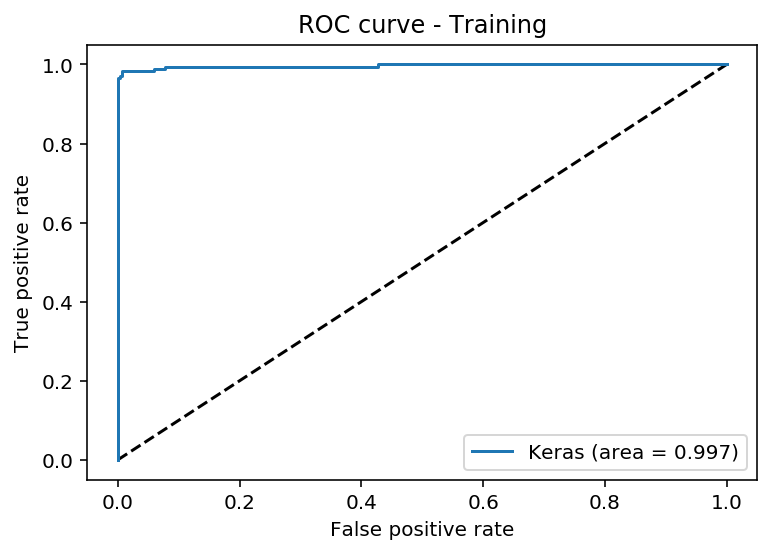

In [15]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training')
plt.legend(loc='best')
plt.show()

2) Support Vector Machine

Support Vector Machine can use a linear and nonlinear function to define the boundaries among the class.
It is useful in binary problem classification because, in case, the observations are not linearly separable, it is possible to use polynomial or radial basis function (non-linear) to find the boundaries to separate the observations. This project uses SVM linear function and SVM non-linear function, called kernel to classify observations.

In [16]:
X = reduced_df.iloc[:,2:29].values
Y = reduced_df.iloc[:,1].values
# Xs = preprocessing.scale(X)
out=pd.DataFrame(Y)
X_train, X_test, y_train, y_test = train_test_split(X, out, test_size=0.20)

In [17]:
# using Suport Vector machines
accuracy_selection = []
cvs_selection = []

model = LinearSVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
scores = cross_val_score(model, X, Y, cv = 5)


accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("LinearSVM Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%}".format(np.mean(scores), np.std(scores)*2))

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, incre

LinearSVM Accuracy: 93.86%
Cross validation score: 91.21%


C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\samee\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
cm = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
confusion = pd.DataFrame(cm,index=['Cancer','Healthy'],
                        columns=['Predicted_Cancer','Predicted_Healthy'])
confusion

,Predicted_Cancer,Predicted_Healthy
Cancer,36,7
Healthy,0,71


In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [20]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#lets start by fitting two models, one more flexible than the #other:

svm3 = SVC(C=1, kernel ='rbf', gamma=50)
svm3.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

#lets start by fitting two models, one more flexible than the #other:

#More constrained model

svm3 = SVC(C=1, kernel ='rbf', gamma=50)
svm3.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
#More flexible model
svm4 = SVC(C=1, kernel = 'rbf', gamma =50)
svm4.fit(X_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_train_score3 =svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

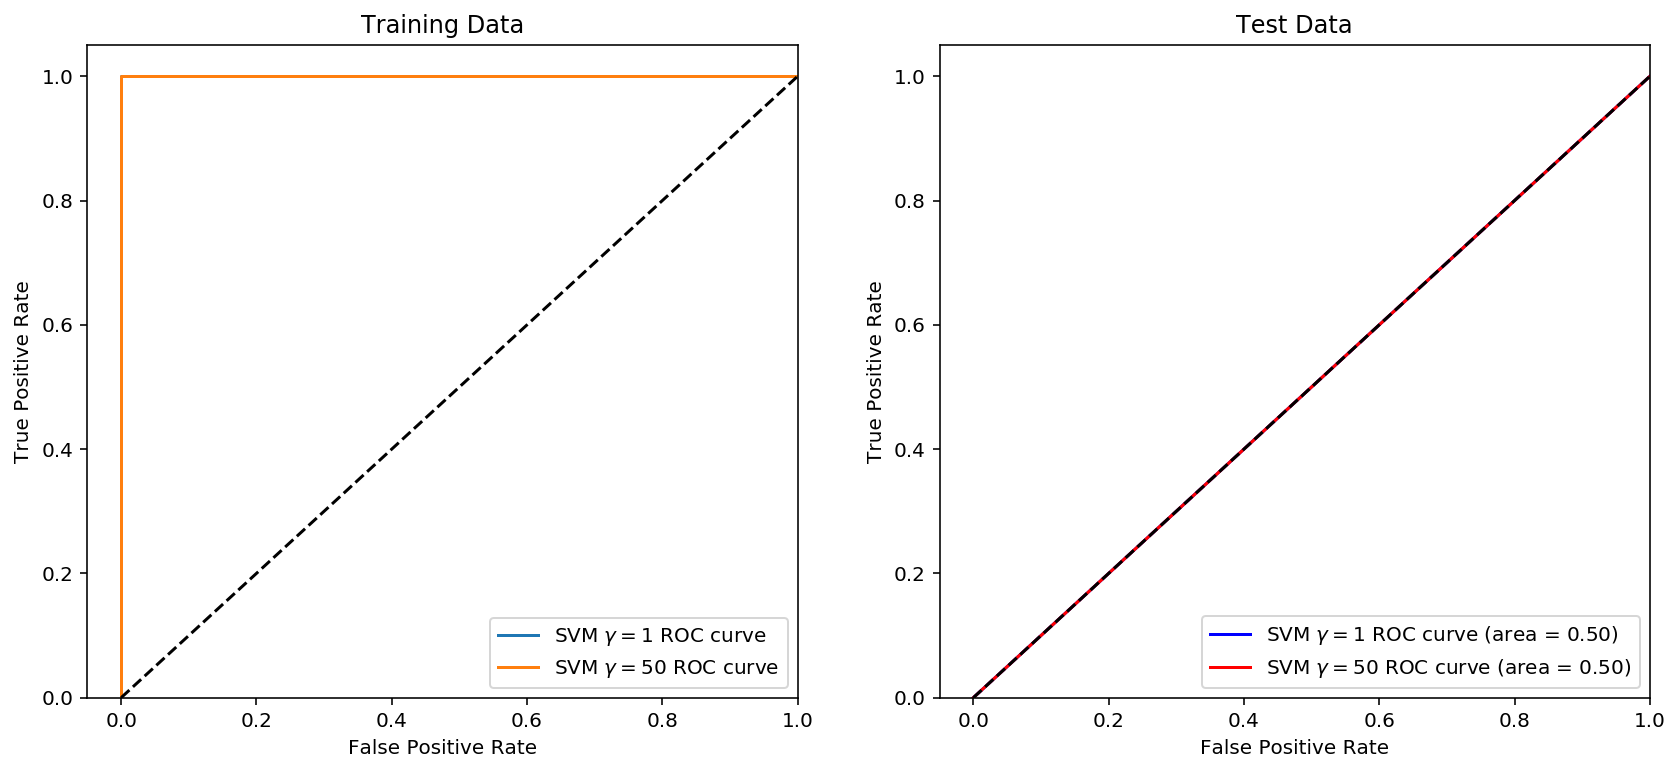

In [24]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _=roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label = 'SVM $\gamma = 1$ ROC curve')
ax1.plot(false_pos_rate4, true_pos_rate4, label ='SVM $\gamma = 50$ ROC curve')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

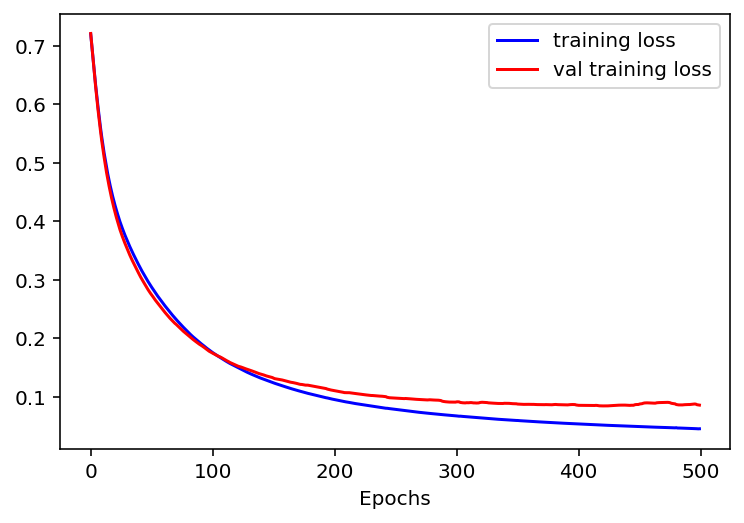

In [25]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Conclusion:

We started by exploring the data. We anlayzed thed data types of the features and converted the string data type to integer(using encoding)

We then checked for missing values and duplicates and dealt with them.

After performing preliminary analysis, we plotted the data to get more insights.

Further we dropped certain features that, upon analysis, we found to be irrelevant to the target variable.

We found the correlation of all the features with the l=target variable as well as among each other. We then found the 11 most optimal feature.

As we can observe, we have reduced the number of features from 30 to 11, and have also increased the accuracy of our model from 94.6% to 98.94% during the process.
